1. Plot (draw) a network with:
 2 inputs,
 2 hidden layers (where the rst layer contains 3 hidden units and the
second contains 2 hidden units) and a
 3-class output (use a softmax function)

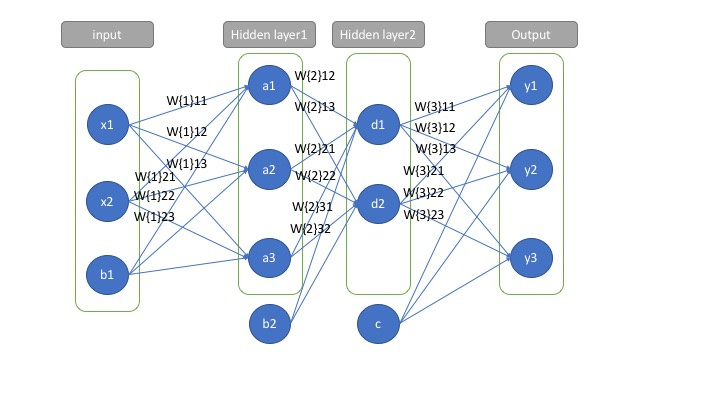

In [89]:
from IPython.display import Image
Image(filename='Slide1.jpeg')

2. Write out the mathematical equation for this network
3. Write out the function in python, call it ff nn 2 ReLu(...)

$output = softmax(max(w_3*max(w_2*max(w_1*x+b1, 0)+b2, 0)+c, 0)) $ 

Softmax: $\sigma(z)_j = \frac{e^{z_j}}{\sum_{k=1}^K e^{z_k}}$ for j = 1,...,k



In [2]:
import numpy as np
###########################
# Setting up General #
# 2 Layer Neural Network #
###########################
def ff_nn_2_ReLu(x,W1,W2,v,b1,b2,c):
    ReLu = np.vectorize(lambda x: np.fmax(0,x))
    a_1 = np.dot(x,W1) + b1
    h1 = ReLu(a_1)
    a_2 = np.dot(h1,W2) + b2
    h2 = ReLu(a_2)
    y = softmax(np.dot(h2,v) + c)
    return y

In [91]:
b1 = np.array([[0,0,1]])
b2 = np.array([[1,-1]])
c = np.array([[1,0,0]])

x = np.array([1, 0, 0, -1, -1, 1]).reshape(2, -1).T
W1 = np.array([1, 0, -1, 0, 0, 0.5]).reshape(3, -1).T
W2 = np.array([1, 0, 0, -1, -1, 0]).reshape(2, -1).T
v = np.array([1, 1, 0, 0, -1, -1]).reshape(3, -1).T
softmax = lambda x: np.exp(x)/(np.exp(x).sum(axis=1, keepdims=True))


In [86]:
nn3_v2 = ff_nn_2_ReLu(x,W1,W2,v,b1,b2,c)

print('''
    ==================
    -- ReLu network --
    ==================
    Probabilities are:
    {probs}
    ---------------------
    '''.format(probs = nn3_v2))


    -- ReLu network --
    Probabilities are:
    [[0.94649912 0.04712342 0.00637746]
 [0.84379473 0.1141952  0.04201007]
 [0.84379473 0.1141952  0.04201007]]
    ---------------------
    


#### Gradient Descent

##### 1
$\frac{\delta f}{\delta x} = 2(x-1)+400x(x^2-y) = 400x^3-400xy+2x-2 \\ \frac{\delta f}{\delta x}=200(y-x^2) = -200x^2+200y $


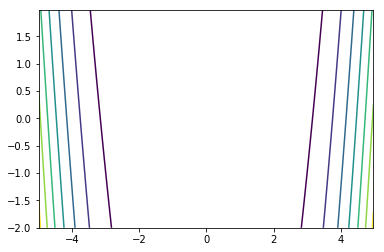

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline


delta = 0.025
x = np.arange(-5, 5, delta)
y = np.arange(-2, 2, delta)


X, Y = np.meshgrid(x,y)
Z = (1-X)**2 + 100*(Y-X**2)**2
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)


In [167]:
def grad_f(vector):
    x, y = vector
    df_dx = 400*x**3-400*x*y+2*x-2
    df_dy = 200*y-200*x**2
    return np.array([df_dx, df_dy])

def grad_descent(starting_point=[-1,-1], iterations=10, learning_rate=12):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-1,1,size=2)     
    trajectory = [point]
    
    for i in range(iterations):
        grad = grad_f(point)
        point = point - learning_rate * grad
        trajectory.append(point)
    return np.array(trajectory)

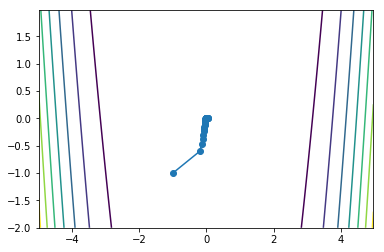

In [168]:
traj = grad_descent(iterations=50,learning_rate = 0.001)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.


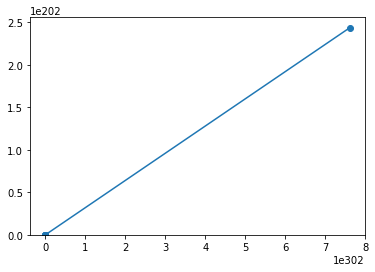

In [169]:
traj = grad_descent(iterations=50, learning_rate=0.5)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

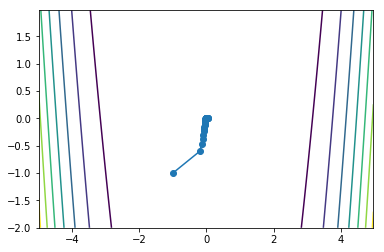

In [170]:

traj = grad_descent(iterations=50, learning_rate = 0.001) 

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

In [186]:
def grad_descent_with_momentum(starting_point=None, iterations=50, alpha=.9, epsilon=10):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-1,1,size=2)
    trajectory = [point]
    v = np.zeros(point.size)
    
    for i in range(iterations):
        grad = grad_f(point)
        v = alpha*v + epsilon*grad
        point = point - v
        trajectory.append(point)
    return np.array(trajectory)

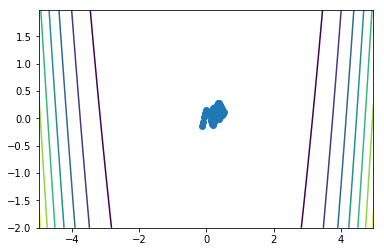

In [178]:
traj = grad_descent_with_momentum(iterations=50, epsilon=0.002, alpha=.99) 
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

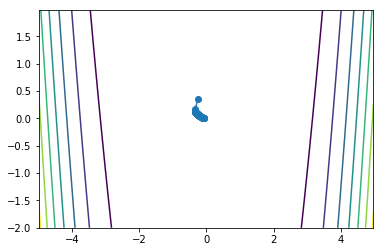

In [177]:
traj = grad_descent_with_momentum(iterations=50, epsilon=0.003, alpha=.001) 
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

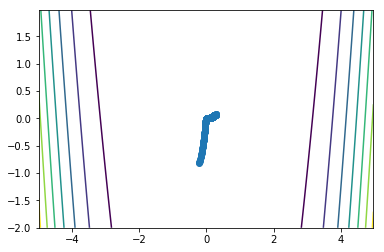

In [192]:
traj = grad_descent_with_momentum(iterations=1000, epsilon=0.0001, alpha=.5) 
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

<br>We have model parameters of weight and bias:$W^1,W^2,W^3,b^1,b^2,b^3$. As $\delta^L = \nabla_{a}L \odot \sigma^{'} (z^L)$, $\delta^l = ((w^{l+1})^T\delta^{l+1} \odot\sigma^{'}(z^l)$, $\frac{\partial L}{\partial b^l_j} = \delta^l_j$, $\frac{\partial L}{\partial w^l_{jk}} = a^{l-1}_k\delta^l_j$.
We know that $\delta^ L$ = $\frac{\partial L}{z^L} = \hat y - y$.

So we have:


$ \frac{\partial L}{\partial W^3} = a^2\delta^L = a^2 (\hat y - y) \\  \frac{\partial L}{\partial b^3} = \delta^L = \hat y - y \\ \frac{\partial L}{\partial W^2} = a^1 \delta^2 = a^1 ((W^3)^T \delta^L)\odot \sigma^{'} (z^2) = a^1((W^3)^T (\hat y-y) \odot \text{relu}^{'} (z^2) \\ \frac{\partial L}{\partial b^2} = \delta^2 = ((W^3)^T \delta^L)\odot \sigma^{'} (z^2) = ((W^3)^T (\hat y-y) \odot \text{relu}^{'} (z^2) \\ \frac{\partial L}{\partial W^1} = x \delta^1 = x((W^2)^T \delta^2)\odot \sigma^{'} (z^1) = x ((W^2)^T \delta^2) \odot \text{relu}^{'} (z^1) \\ \frac{\partial L}{\partial b^1} = \delta^1 = ((W^2)^T \delta^2) \odot \text{relu}^{'} (z^1) $

In [8]:
def loss(y, y_hat):
    tot = y * np.log(y_hat)
    return  -tot.sum()

def softmax(z):
    return np.exp(z)/(np.sum(np.exp(z),axis=1))[:,np.newaxis]

def relu_derivative(x):
    return np.where(x>0, 1, 0)

def forward(x,parameters):
    ReLu = np.vectorize(lambda x: np.fmax(0,x))
    w_1,w_2,w_3,b_1,b_2,b_3 = parameters  
    z_1 = x.dot(w_1.T) + b_1.T
    a_1 = ReLu(z_1)
    z_2 = a_1.dot(w_2.T) + b_2.T
    a_2 = ReLu(z_2)
    z_3 = a_2.dot(w_3.T) + b_3.T
    y_hat = softmax(z_3)   
    return y_hat,z_1,a_1,z_2,a_2,z_3

def grad_f(x,y,parameters):    
    w_1,w_2,w_3,b_1,b_2,b_3 = parameters   
    y_hat,z_1,a_1,z_2,a_2,z_3 = forward(x,parameters)   
    dw3 = np.zeros((3,2))
    db3 = np.zeros((3,1))
    dw2 = np.zeros((2,3))
    db2 = np.zeros((2,1))
    dw1 = np.zeros((3,2))
    db1 = np.zeros((3,1))    
    for i in range(x.shape[0]):
        dL = y_hat[i].reshape(3,1) - y[i].reshape(3,1)
        db3+= dL
        dw3+= dL.dot(a_2[i].reshape(1,2))  
        delta2 = w_3.T.dot(dL)*relu_derivative(z_2[i].reshape(2,1))  
        db2+= delta2   
        dw2+= delta2.dot(a_1[i].reshape(1,3))       
        delta1 = w_2.T.dot(delta2)*relu_derivative(z_1[i].reshape(3,1))       
        db1+= delta1     
        dw1+= delta1.dot(x[i].reshape(1,2)) 
    return dw1, dw2, dw3,db1,db2,db3

#### 3.3

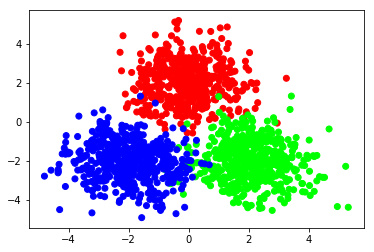

In [6]:
mu1 = [0, 2]
mu2 = [2,-2]
mu3 = [-2,-2]
cov = [[1, 0], [0, 1]]
y1 = np.array([[1,0,0]]*500)
y2 = np.array([[0,1,0]]*500)
y3 = np.array([[0,0,1]]*500)

x1 = np.random.multivariate_normal(mu1, cov, 500)
x2 = np.random.multivariate_normal(mu2, cov, 500)
x3 = np.random.multivariate_normal(mu3, cov, 500)
x = np.concatenate((x1,x2,x3))
y = np.concatenate((y1,y2,y3))
plt.scatter(x[:,0], x[:,1],c=y)


#### 3.4

In [10]:
b_1 = np.array([[0,0,1]]).T
b_2 = np.array([[1,-1]]).T
b_3 = np.array([[1,0,0]]).T
w_1 = np.array([1, 0, -1, 0, 0, 0.5]).reshape((3,2))
w_2 = np.array([1, 0, 0, -1, -1, 0]).reshape((2,3))
w_3 = np.array([1, 1, 0, 0, -1, -1]).reshape((3,2))

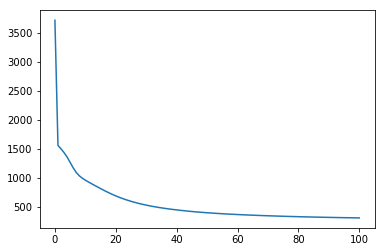

In [15]:
def grad_descent(x, y, parameters, iterations=10, learning_rate=2):
    point = parameters
    trajectory = [point]
    losses = [loss(y, forward(x,point)[0])]
    
    for i in range(iterations):
        y_hat = forward(x,point)[0]
        grad = grad_f(x, y,point)
        point= np.subtract(point,[j*learning_rate for j in grad])
        trajectory.append(point)
        losses.append(loss(y, forward(x,point)[0]))
    return (np.array(trajectory), losses)
parameters = [w_1,w_2,w_3,b_1,b_2,b_3]
traj, losses = grad_descent(x ,y,parameters, iterations=100,learning_rate=0.0005)
plt.plot(losses)

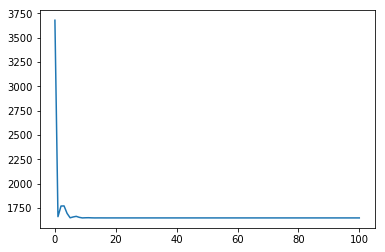

In [260]:
def grad_descent_with_momentum(x,y,parameters, iterations=10, alpha=.9, epsilon=10):
    point = parameters
    trajectory = [point]
    losses = [loss(y, forward(x,point)[0])]
    v = [np.zeros(np.shape(i)) for i in parameters]
    
    for i in range(iterations):
        y_hat = forward(x,point)[0]
        grad = grad_f(x, y,point)
        v = np.add([alpha*i for i in v],[j*epsilon for j in grad])
        point = point - v
        trajectory.append(point)
        losses.append(loss(y, forward(x,point)[0]))
    return (np.array(trajectory),losses)

parameters = [w_1,w_2,w_3,b_1,b_2,b_3]
traj, losses = grad_descent_with_momentum(x ,y,parameters, iterations=100,alpha=.6, epsilon=0.001)
plt.plot(losses)

Yes, based on these two graphs, we can see that the Gradient Descent with Momentum is more efficient as it converges faster than that of normal Gradient Descent. 